<a href="https://colab.research.google.com/github/Sowmini1997/Yes_bank_stock_closing_price_prediction/blob/main/Yes_bank_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes bank stock price prediction
## Team project , Team members- Satish, Sowmini


### problem discription 
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.


Importing required features for data importing and visuallization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Supervised ML regression - Capstone Project/data_YesBank_StockPrices.csv')
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Getting Date column in proper format**

In [ ]:
import datetime
from time import strptime
new_df=df.copy()
new_df=df['Date'].str.split("-", n = 1, expand = True)
new_df["month_Num"]= new_df[0]
new_df['month_Num'] = new_df['month_Num'].apply(lambda x: strptime(x,'%b').tm_mon)
new_df["year"]= new_df[1]
new_df['year'] = new_df['year'].apply(lambda x: int(x)+2000)
new_df["period"] = new_df["year"].astype(str) + new_df["month_Num"].astype(str)
new_df["period"]= new_df[['year', 'month_Num']].astype(str).agg('-'.join, axis=1)
new_df.head()

,0,1,month_Num,year,period
0,Jul,05,7,2005,2005-7
1,Aug,05,8,2005,2005-8
2,Sep,05,9,2005,2005-9
3,Oct,05,10,2005,2005-10
4,Nov,05,11,2005,2005-11


In [ ]:
from datetime import datetime
df['Date_new_format'] =  new_df['period'].apply(lambda x: datetime.strptime(x,'%Y-%m'))
df.Date_new_format= pd.to_datetime(new_df.period)
df.head()

,Date,Open,High,Low,Close,Date_new_format
0,Jul-05,13.00,14.00,11.25,12.46,2005-07-01
1,Aug-05,12.58,14.88,12.55,13.42,2005-08-01
2,Sep-05,13.48,14.87,12.27,13.30,2005-09-01
3,Oct-05,13.20,14.47,12.40,12.99,2005-10-01
4,Nov-05,13.35,13.88,12.88,13.41,2005-11-01


In [ ]:
del df['Date']
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df.head()

,Date_new_format,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


Now, we can see that we have imported the data into dataframe and created a new field Date_new_format with date-time objects. this format gives us some advantage while working with time series models. 

As from the problem statement one can see that our target variable is close price. We are first going to apply some models which require only target variables. (ARIMA , PROPHET, Moving Average)

In [ ]:
df_withDate=df.copy()

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
df.index = df['Date_new_format']
data = df.sort_index(ascending=True, axis=0)
X=df.values
size = int(len(X) * 0.8)
train = data[:size]
valid = data[size:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)


forecast = model.predict(n_periods=37)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1097.698, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1133.801, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1093.751, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1099.215, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1135.801, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1095.486, Time=0.41 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1095.510, Time=0.45 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1099.357, Time=0.39 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1096.903, Time=1.47 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1092.176, Time=0.11 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1093.807, Time=0.33 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1093.852, Time=0.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1097.977, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,1)(1,1,0)[12]

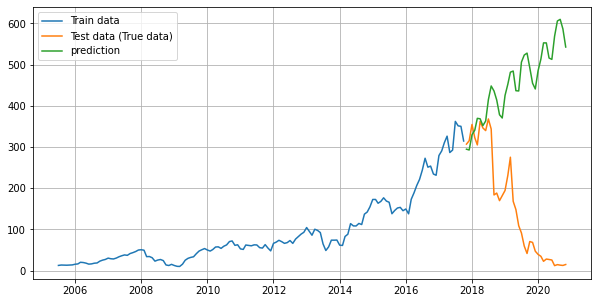

In [ ]:
plt.plot(train['Close'],label="Train data")
plt.plot(valid['Close'],label="Test data (True data)")
plt.plot(forecast['Prediction'],label="prediction")
plt.legend()
plt.grid(True)

**Implementing PROPHET**

In [ ]:
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(new_data)):
    new_data['Date'][i] = df['Date_new_format'][i]
    new_data['Close'][i] = df['Close'][i]


new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
P=df.values
size = int(len(P) * 0.8)
#train and validation
train = new_data[:size]
valid = new_data[size:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_valid = forecast['yhat'][148:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

222.23666116714602

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



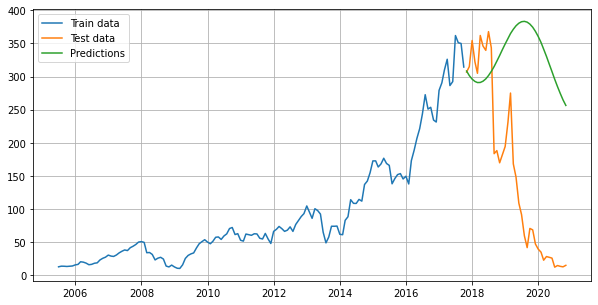

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'],label="Train data")
plt.plot(valid['y'],label="Test data")
plt.plot(valid['Predictions'],label="Predictions")
plt.legend()
plt.grid(True)


**Moving Average**

In [ ]:
data = df_withDate.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df_withDate)),columns=['Date', 'Close'])
new_data.index=df_withDate["Date_new_format"]
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date_new_format'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
X=df.values
size = int(len(X) * 0.8)
train = new_data[:size]
valid = new_data[size:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-37+i:].sum() + sum(preds)
    b = a/37
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(148, 2)

 Shape of validation set:
(37, 2)

 RMSE value on validation set:
166.99965350121377


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



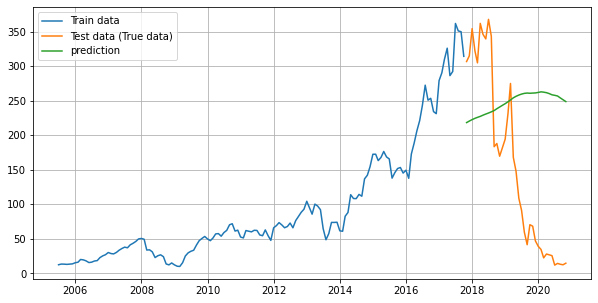

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'],label="Train data")
plt.plot(valid['Close'],label="Test data (True data)")
plt.plot(valid['Predictions'],label="prediction")
plt.legend()
plt.grid(True)


One can see that methods which are based on target variable are performing poorly. One of the reason for this can be strong correlation between target and input variables which means target variables are not independent. Let us check correlation between input and target variables

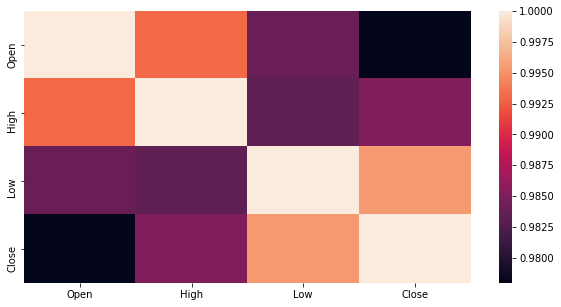

In [ ]:
df=df[['Open','High','Low','Close']]
sns.heatmap(df.corr())

One can see a strong correlation between input and target variables. Let us try Linear regression and some other Techniques which uses input features for the model.


**Linear Regression**

### Feature selection
Apart from given input variables, Date is divided into years and months and added as two addition input features. 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Supervised ML regression - Capstone Project/data_YesBank_StockPrices.csv')
date_df=df['Date'].str.split("-", n = 1, expand = True)
date_df[0] = date_df[0].apply(lambda x: strptime(x,'%b').tm_mon)
date_df['year'] = date_df[1].apply(lambda x: int(x)+2000)
date_df["period"] = date_df['year'].astype(str) + date_df[0].astype(str)
date_df["period"]= date_df[['year', 0]].astype(str).agg('-'.join, axis=1)
date_df['Date_new_format'] =  date_df['period'].apply(lambda x: datetime.strptime(x,'%Y-%m'))
date_df.Date_new_format= pd.to_datetime(date_df.period)
date_df['month']=date_df[0]
date_df.head()

,0,1,year,period,Date_new_format,month
0,7,05,2005,2005-7,2005-07-01,7
1,8,05,2005,2005-8,2005-08-01,8
2,9,05,2005,2005-9,2005-09-01,9
3,10,05,2005,2005-10,2005-10-01,10
4,11,05,2005,2005-11,2005-11-01,11


In [ ]:
df.index = date_df['Date_new_format']
date_df.index=date_df['Date_new_format']
X=df.copy()
Y=df['Close']

X.drop(['Date','Close'],axis=1,inplace=True)
X['month']=date_df['month']
X['year']=date_df['year']
size = int(len(X.values) * 0.8)
X_train=X[:size]
X_test=X[size:]
Y_train=Y[:size]
Y_test=Y[size:]




In [ ]:
date_df

,0,1,year,period,Date_new_format,month
Date_new_format,,,,,,
2005-07-01,7,05,2005,2005-7,2005-07-01,7
2005-08-01,8,05,2005,2005-8,2005-08-01,8
2005-09-01,9,05,2005,2005-9,2005-09-01,9
2005-10-01,10,05,2005,2005-10,2005-10-01,10
2005-11-01,11,05,2005,2005-11,2005-11-01,11
...,...,...,...,...,...,...
2020-07-01,7,20,2020,2020-7,2020-07-01,7
2020-08-01,8,20,2020,2020-8,2020-08-01,8
2020-09-01,9,20,2020,2020-9,2020-09-01,9


In [ ]:
ind=date_df['month']

In [ ]:
ind=pd.DataFrame(ind)

In [ ]:
ind['year']=date_df['year']

In [ ]:
ind['date'] = ind['month'].map(str)+ '-' +ind['year'].map(str)
ind['date'] = pd.to_datetime(ind['date'], format='%m-%Y').dt.strftime('%m-%Y')

In [ ]:
index_df=ind.copy()

In [ ]:
ind=ind[size:]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


10.608732187763408

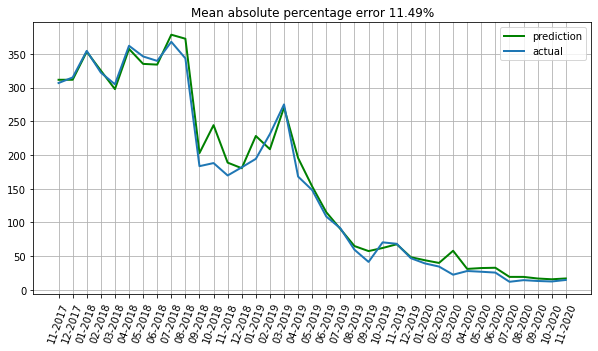

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error

lrmodel=LR()
lrmodel.fit(X_train,Y_train)
lrpred=lrmodel.predict(X_test)
lrpred_df=pd.DataFrame(lrpred)

lrpred_df.index=ind['date']
#lrpred_df['date'] = date_df['month'].map(str)+ '-' +date_df['year'].map(str)
#lrpred_df['date'] = pd.to_datetime(lrpred_df['date'], format='%m-%Y').dt.strftime('%m-%Y')

plt.plot(lrpred_df, "g", label="prediction", linewidth=2.0)
plt.plot(Y_test.values, label="actual", linewidth=2.0)
plt.legend()

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
error = mean_absolute_percentage_error(lrpred, Y_test)
plt.title("Mean absolute percentage error {0:.2f}%".format(error))
plt.grid(True)
plt.xticks(rotation=70) 
mean_absolute_error(Y_test,lrpred)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



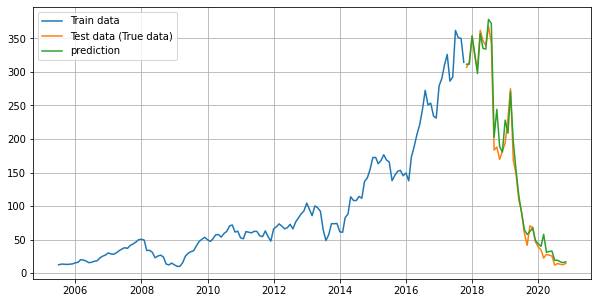

In [ ]:
train = df[:size]
valid = df[size:]
valid['Predictions'] = 0
valid['Predictions'] = lrpred

valid.index = df[size:].index
train.index = df[:size].index

plt.plot(train['Close'],label="Train data")
plt.plot(valid['Close'],label="Test data (True data)")
plt.plot(valid['Predictions'],label="prediction")
plt.legend()
plt.grid(True)


In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(valid['Predictions'])),2)))
rms

16.034221082938277

In [ ]:
date_df=date_df[:size]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


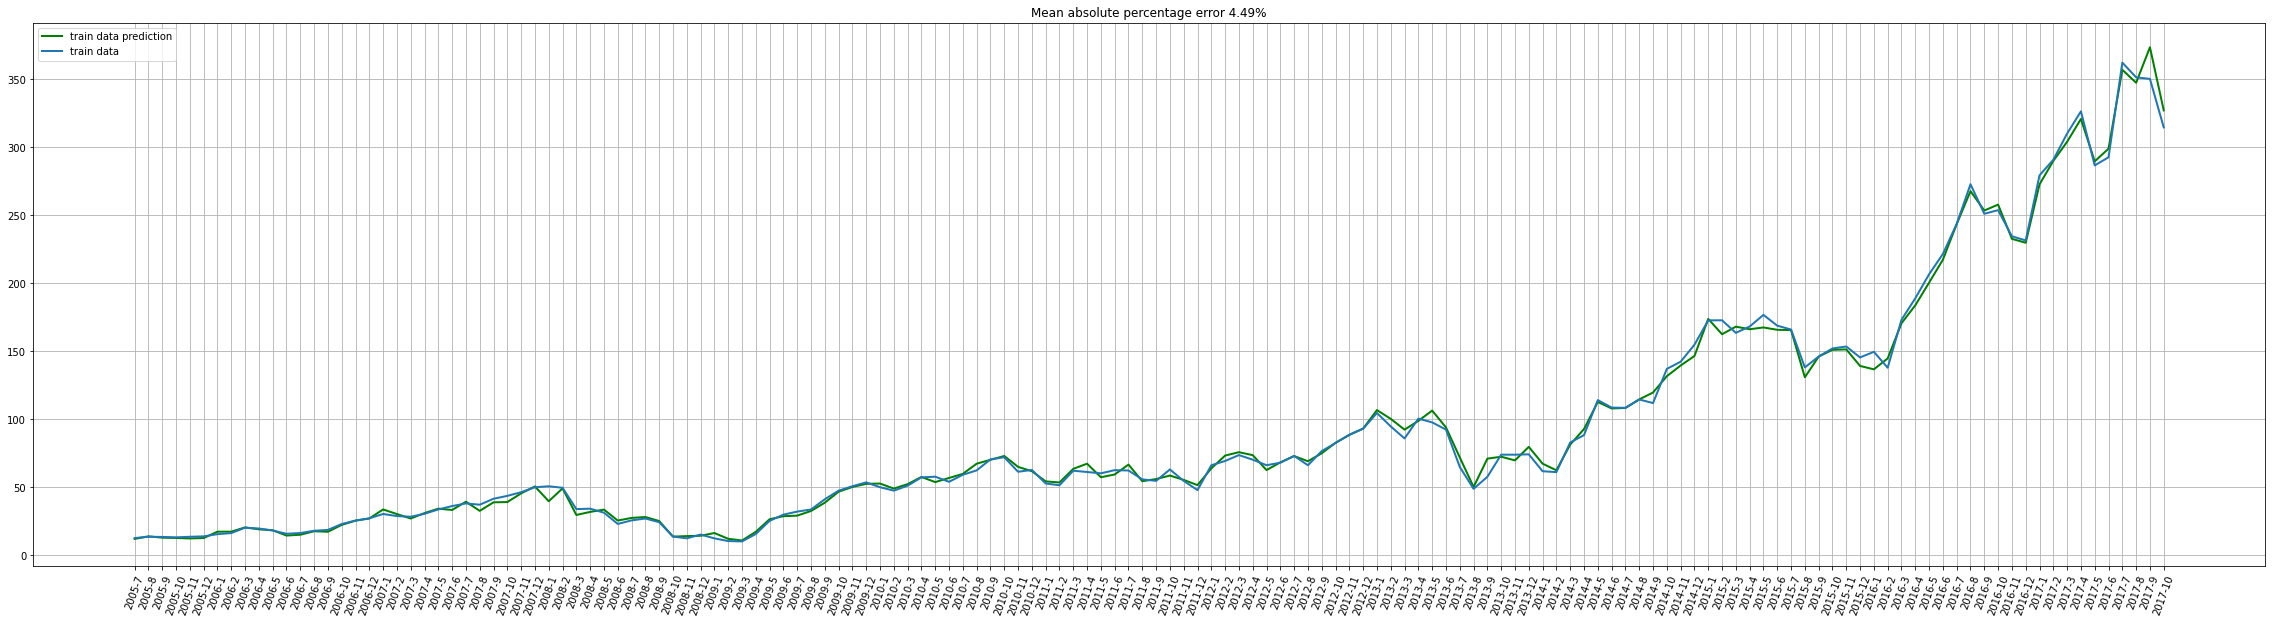

In [ ]:
modelpred=lrmodel.predict(X_train)
modelpred_df=pd.DataFrame(modelpred)
modelpred_df.index=date_df['period']
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(modelpred_df, "g", label="train data prediction", linewidth=2.0)
plt.plot(Y_train.values, label="train data", linewidth=2.0)
plt.legend()

error = mean_absolute_percentage_error(modelpred, Y_train)
plt.title("Mean absolute percentage error {0:.2f}%".format(error))
plt.xticks(rotation=70) 
plt.grid(True)





One can see that there only 5% difference in error of fitted model and error of validation. One can conclude that model is not overfititting or underfitting. 

Let us try some other techniquies like regularization, XGboost and KNN to reduce the error. 

**Lasso and Ridge regularization**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Mean absolute percentage error 10.61%')

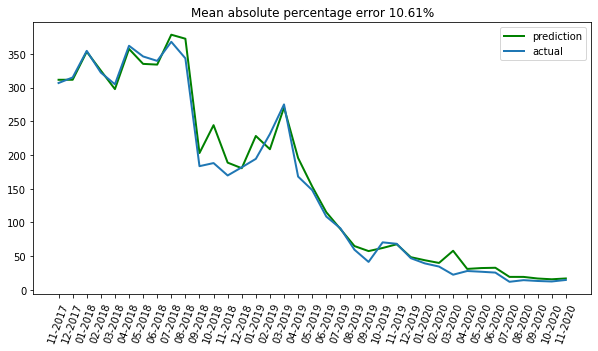

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train, Y_train)
rdpred=ridge.predict(X_test)
rdpred_df=pd.DataFrame(rdpred)
rdpred_df.index=ind['date']
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(rdpred_df, "g", label="prediction", linewidth=2.0)
plt.plot(Y_test.values, label="actual", linewidth=2.0)
plt.legend()
plt.xticks(rotation=70) 
error=mean_absolute_error(Y_test,rdpred)
plt.title("Mean absolute percentage error {0:.2f}%".format(error))



In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(rdpred)),2)))
rms

16.033718796871057

In [ ]:
mean_absolute_error(Y_test,rdpred)

10.60820239188858

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Mean absolute percentage error 11.31%')

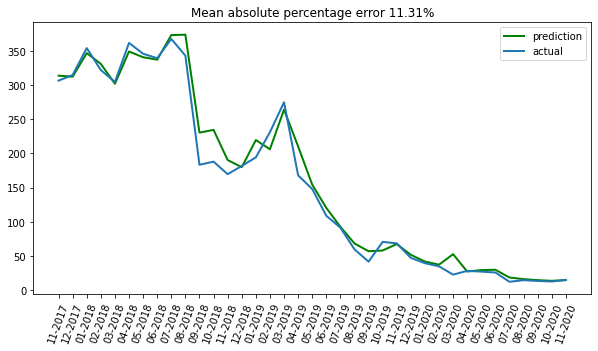

In [ ]:
lasso = LassoCV(cv=5)
lasso.fit(X_train, Y_train)
lassopred=lasso.predict(X_test)
lassopred_df=pd.DataFrame(lassopred)
lassopred_df.index=ind['date']
plt.plot(lassopred_df, "g", label="prediction", linewidth=2.0)
plt.plot(Y_test.values, label="actual", linewidth=2.0)
plt.legend()
plt.xticks(rotation=70) 
plt.rcParams["figure.figsize"] = (10,5)
error=mean_absolute_error(Y_test,lassopred)
plt.title("Mean absolute percentage error {0:.2f}%".format(error))

**XGBoost**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
model = XGBRegressor()
param_grid = {
    'n_estimators': [100, 300, 500],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, Y_train, Y_test, model, 
                                 param_grid, cv=tscv)
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed:   32.9s


[11:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 300, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  1.3min finished


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Mean absolute percentage error 20.66%')

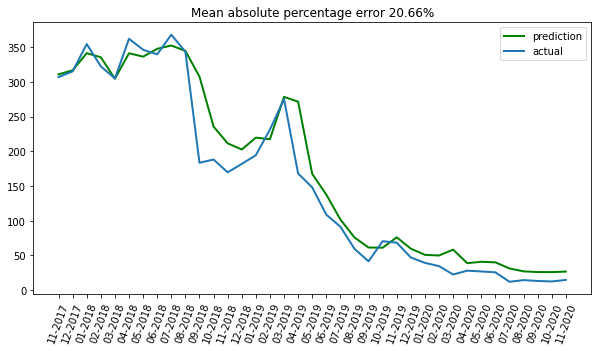

In [ ]:
xgb = model.best_estimator_
xgpred= xgb.predict(X_test)
xgpred_df=pd.DataFrame(xgpred)
xgpred_df.index=ind['date']
plt.plot(xgpred_df, "g", label="prediction", linewidth=2.0)
plt.plot(Y_test.values, label="actual", linewidth=2.0)
plt.legend()
plt.xticks(rotation=70) 
error=mean_absolute_error(Y_test,xgpred)
plt.title("Mean absolute percentage error {0:.2f}%".format(error))

**KNN**

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
df_withDate.index=df_withDate["Date_new_format"]
del df_withDate["Date_new_format"]
train = df_withDate[:size]
valid = df_withDate[size:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [ ]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
model.best_score_

0.5751597769522313

In [ ]:
model.best_params_

{'n_neighbors': 3}

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

21.60955816077469

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Mean absolute percentage error 12.94%')

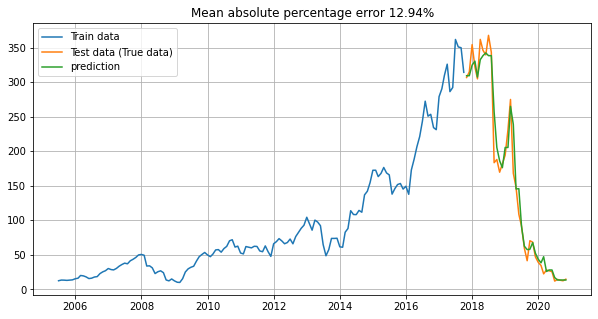

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'],label="Train data")
plt.plot(valid['Close'],label="Test data (True data)")
plt.plot(valid['Predictions'],label="prediction")
plt.legend()
plt.grid(True)
error=mean_absolute_error(valid['Close'],valid['Predictions'])
plt.title("Mean absolute percentage error {0:.2f}%".format(error))

## Conclusion

<ul>
<li> Target variable is strongly dependent on input variables</li>
<li> Target based methods like ARIMA, Prophet, Moving Average are perfoming poorly as Target varaible is dependent </li>
<li> Linear Regression is performing better than any other model </li>
<li> Apert from Linear regreesion , Ridge and KNN models are showing good performence </li>
<li> We are getting error of around 10% and may not be able to reduce this using any linear models as we  have small amount of data, relation between target and input varibles may be nonlinear.
</ul>